# About the notebook

### Goal: 
**in analysis one, fit the model with different model complexities and test interactions using logistic regression (link = "logit")**

### Recall the question in Analysis 1
**Consider the respiratory status at visit 1 as the outcome. Fit an appropriate model evaluating the treatment effect with a possible adjustment for gender and age. Interpret the results.**

# Import data

In [1]:
library(lmtest)
source("./codesnippet_r/final_proj_config.R")
source("./codesnippet_r/fun_walds.R")
source("./codesnippet_r/fun_hosmerlem.R")
head(dat_v1)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Parsed with column specification:
cols(
  patient = col_integer(),
  treatment = col_integer(),
  gender = col_integer(),
  age = col_integer(),
  visit1 = col_integer(),
  visit2 = col_integer(),
  visit3 = col_integer(),
  visit4 = col_integer()
)


trt,age,gender,y,n
Placebo,13,Male,4,7
Placebo,13,Female,10,12
Placebo,14,Male,5,7
Placebo,14,Female,4,4
Placebo,15,Male,2,3
Placebo,19,Male,3,6


# fit model with all pairwise interactions of variables

**First we fitted the model with all pairwise interactions of variables. It turns out that the coefficients of all the interaction terms were not significiant under the level 0.05**

In [2]:
### initialization
df = dat_v1

### fit the model
fit_logit_int = glm(cbind(y, n-y) ~ .^2, data = df, family = binomial(link = "logit"), x = T)
summary(fit_logit_int)


Call:
glm(formula = cbind(y, n - y) ~ .^2, family = binomial(link = "logit"), 
    data = df, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2980  -0.9938   0.3317   0.9959   2.0354  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)   
(Intercept)            -0.08805    0.61265  -0.144  0.88572   
trtActive               0.67119    0.85265   0.787  0.43118   
age                     0.05770    0.02212   2.609  0.00907 **
genderFemale            1.14961    0.99831   1.152  0.24951   
trtActive:age          -0.01005    0.03099  -0.324  0.74562   
trtActive:genderFemale -0.01147    0.73253  -0.016  0.98751   
age:genderFemale       -0.01051    0.03566  -0.295  0.76815   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.638  on 58  degrees of freedom
Residual deviance: 74.755  on 52  degrees of freedom
AIC: 158.35

Number of Fisher Sco

**We can further perform the Wald test for all the interaction terms. The wald's statistics of interaction terms is about 0.00006 (p value ~ 0.99). Therefore, under level 0.05, we do not think there are interactions between variables and thus drop the interaction terms in our model**

In [3]:
### contrast matrix
L = diag(7)[, -c(1:4)]

### wald statistics to test all interaction terms together
fun_walds_glm(fit_logit_int, L)

6.864368e-05
0.9999998


**Since we want to drop the interaction terms, we now have models with linear terms of each variables**

In [4]:
### initialization
dat = dat_v1

### fit the model
fit_logit = glm(cbind(y, n-y) ~ ., data = dat, family = binomial(link = "logit"), x = T)
summary(fit_logit)


Call:
glm(formula = cbind(y, n - y) ~ ., family = binomial(link = "logit"), 
    data = dat, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2463  -1.0027   0.2848   1.0096   1.9923  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.09702    0.43521   0.223 0.823587    
trtActive     0.39495    0.28262   1.397 0.162268    
age           0.05092    0.01497   3.402 0.000669 ***
genderFemale  0.85036    0.33305   2.553 0.010672 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.638  on 58  degrees of freedom
Residual deviance: 74.945  on 55  degrees of freedom
AIC: 152.54

Number of Fisher Scoring iterations: 5


**Notice that the effect of treatment is not significant; Therefore, remove...**

In [5]:
### initialization
dat = dat_v1

### fit the model
fit_logit = glm(cbind(y, n-y) ~ age + gender, data = dat, family = binomial(link = "logit"), x = T)
summary(fit_logit)


Call:
glm(formula = cbind(y, n - y) ~ age + gender, family = binomial(link = "logit"), 
    data = dat, x = T)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3225  -0.9379   0.3233   0.9459   2.0805  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.27923    0.41526   0.672 0.501313    
age           0.05104    0.01498   3.408 0.000654 ***
genderFemale  0.80035    0.33042   2.422 0.015425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.638  on 58  degrees of freedom
Residual deviance: 76.930  on 56  degrees of freedom
AIC: 152.53

Number of Fisher Scoring iterations: 5


# How well the model fit?

**We can plot the standardized residuals to check how the model fit the data.**

In [6]:
df = cbind(dat, f.glm.diag(fit_logit))
head(df, 3)

trt,age,gender,y,n,spres,sdres,lres,ares,h
Placebo,13,Male,4,7,-0.91309320,-0.87594932,-0.8791876,-0.87852299,0.08553036
Placebo,13,Female,10,12,-0.19255517,-0.18955753,-0.1901462,-0.18957759,0.19514260
Placebo,14,Male,5,7,-0.09645658,-0.09589151,-0.0959346,-0.09589527,0.07604650


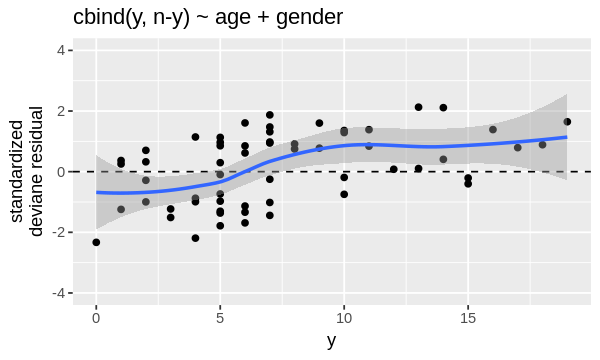

In [7]:
df  = cbind(dat, f.glm.diag(fit_logit))

gp  = ggplot(df, aes(x = y, y = sdres))
gp  = gp +
    geom_point() + 
    ylim(c(-4, 4)) + 
    geom_hline(yintercept = 0, lty = 2) +
    geom_smooth(method = "loess", span = 0.8) +
    labs(title = "cbind(y, n-y) ~ age + gender",
         x = "y", y = "standardized\ndeviane residual")

options(repr.plot.height = 3, repr.plot.width = 5)
print(gp)

## Hosmolimashow

In [8]:
### initialization
dat = dat_v1

###
fun_hosmerlem(dat$y, fit_logit$fitted.values, g = 2)

$chisq
[1] 30008.51

$p.value
[1] 0

# test for higher order term

In [9]:
### initialization
dat = dat_v1

### fit the model
fit_logit    = glm(cbind(y, n-y) ~ age + gender, data = dat, family = binomial(link = "logit"), x = T)
fit_logit_sq = glm(cbind(y, n-y) ~ age + I(age^2) + gender, data = dat, family = binomial(link = "logit"), x = T)

We do not reject the null. Therefore, I do not add squared term into our model

In [10]:
lrtest(fit_logit, fit_logit_sq)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
3,-73.26519,NA,NA,NA
4,-71.87173,1,2.786921,0.09503669


# Test if we need to use different link to update 

In [13]:
dG = function(p, alpha){
    log(1 - p) / ((1 - p)^alpha - 1) - alpha^{-1}
} # end func

dat   = dat_v1
fit_logit    = glm(cbind(y, n-y) ~ age + gender, data = dat, family = binomial(link = "logit"), x = T)

dat$z = dG(fit_logit$fitted.values, 1)
head(dat, 3)

trt,age,gender,y,n,z
Placebo,13,Male,4,7,0.7671691
Placebo,13,Female,10,12,1.2375987
Placebo,14,Male,5,7,0.7932055


Since the z term is not significant under level 0.05, we decided not to change our link for other $\alpha$

In [12]:
fit_link = glm(cbind(y, n - y) ~ age + gender + z, data = dat, family = binomial(link = "logit"))
anova(fit_link, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,58,98.63849,NA
age,1,15.175859,57,83.46263,9.794765e-05
gender,1,6.532274,56,76.93036,1.059345e-02
z,1,2.238972,55,74.69139,1.345704e-01


# What if we try to fit the model by categorizing age and test if the effect of age  is linear or nonlinear?

This part can be done later.